In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
url = 'https://github.com/dhyan6/data-science-projects/blob/main/kc_house_data.csv?raw=true'
houses = pd.read_csv(url)
print(houses.head())

      price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  condition  \
0  221900.0         3       1.00         1180      5650     1.0          3   
1  538000.0         3       2.25         2570      7242     2.0          3   
2  180000.0         2       1.00          770     10000     1.0          3   
3  604000.0         4       3.00         1960      5000     1.0          5   
4  510000.0         3       2.00         1680      8080     1.0          3   

   grade  sqft_above  sqft_basement  zipcode  
0      7        1180              0    98178  
1      7        2170            400    98125  
2      6         770              0    98028  
3      7        1050            910    98136  
4      8        1680              0    98074  


In [4]:
print(houses.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21613 non-null  float64
 1   bedrooms       21613 non-null  int64  
 2   bathrooms      21613 non-null  float64
 3   sqft_living    21613 non-null  int64  
 4   sqft_lot       21613 non-null  int64  
 5   floors         21613 non-null  float64
 6   condition      21613 non-null  int64  
 7   grade          21613 non-null  int64  
 8   sqft_above     21613 non-null  int64  
 9   sqft_basement  21613 non-null  int64  
 10  zipcode        21613 non-null  int64  
dtypes: float64(3), int64(8)
memory usage: 1.8 MB
None


<AxesSubplot:>

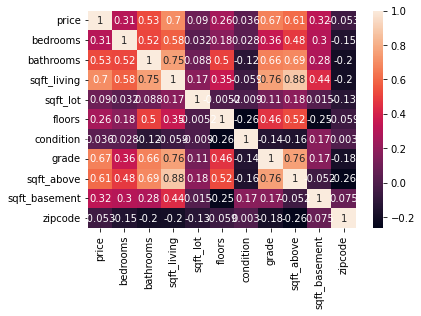

In [5]:
correlations = houses.corr()
sns.heatmap(correlations, annot=True)

<AxesSubplot:title={'center':'Precio de la vivienda vs Pies Cuadrados'}, xlabel='Pies cuadrados', ylabel='Precio de la vivienda (en millones)'>

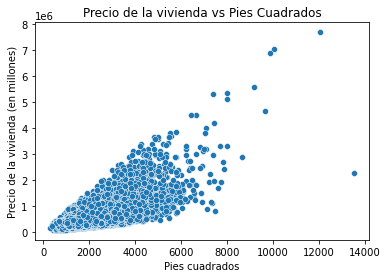

In [6]:
plt.title("Precio de la vivienda vs Pies Cuadrados")
plt.xlabel("Pies cuadrados")
plt.ylabel("Precio de la vivienda (en millones)")
sns.scatterplot(x='sqft_living', y='price',
data=houses)

In [7]:
from sklearn.model_selection import train_test_split
X = houses[['sqft_living']]
Y = houses['price']
x_train, x_test, y_train, y_test = train_test_split(X, Y)

-27375.62117000646
[272.50822334]


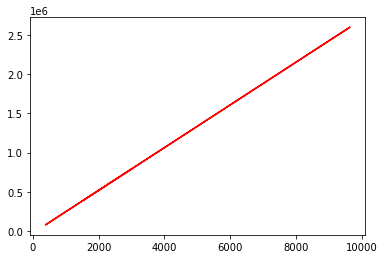

In [8]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train, y_train)
print(lr.intercept_)
print(lr.coef_)
plt.plot(x_train, lr.coef_*x_train + lr.intercept_, '-r', label='Intercept: -39,163 \nSlope: 279.4')

In [10]:
lr.predict([[4600]])


array([1226162.20621399])

In [11]:
y_pred = lr.predict(x_test)
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print('Root Mean Squared Error: ' + str(rmse))

Root Mean Squared Error: 276952.9981460596


In [12]:
from sklearn.metrics import r2_score
print(r2_score(y_test, y_pred))

0.5197225990557466
